In [1]:
import scipy.stats
import pandas as pd
import numpy as np

In [2]:
SOS_women = pd.read_csv("../Bias_scores/SOS_bias_scores_swear_list_2.csv", index_col=False)["mean_SOS_women"].values.tolist()
ECT_women = pd.read_csv("../Bias_scores/ECT_bias_scores.csv", index_col=False)["ECT_Gender_bias_reversed"].values.tolist()
RNSB_women = pd.read_csv("../Bias_scores/RNSB_bias_scores.csv", index_col=False)["RNSB_Gender bias"].values.tolist()
RND_women = pd.read_csv("../Bias_scores/RND_bias_scores.csv", index_col=False)["RND_Gender_bias "].values.tolist()
WEAT_women = pd.read_csv("../Bias_scores/WEAT_bias_scores.csv", index_col=False)["WEAT_Gender bias"].values.tolist()

In [3]:
SOS_eth = pd.read_csv("../Bias_scores/SOS_bias_scores_swear_list_2.csv", index_col=False)["mean_SOS_eth"].values.tolist()
ECT_eth = pd.read_csv("../Bias_scores/ECT_bias_scores.csv", index_col=False)["ECT_Racial_bias_reversed"].values.tolist()
RNSB_eth = pd.read_csv("../Bias_scores/RNSB_bias_scores.csv", index_col=False)["RNSB_Racial bias"].values.tolist()
RND_eth = pd.read_csv("../Bias_scores/RND_bias_scores.csv", index_col=False)["RND_Racial_bias"].values.tolist()
WEAT_eth = pd.read_csv("../Bias_scores/WEAT_bias_scores.csv", index_col=False)["WEAT_Racial bias"].values.tolist()

In [4]:
df = pd.read_csv("../Bias_scores/SOS_bias_scores_swear_list_2.csv", index_col=False)

In [5]:
df.columns

Index(['word embeddings', 'mean_SOS_min', 'mean_SOS_maj', 'mean_SOS_women',
       'mean_SOS_lgbtq', 'mean_SOS_eth', 'mean_SOS_men', 'mean_SOS_straight',
       'mean_SOS_white', 'gender_diff', 'so_diff', 'racial_diff'],
      dtype='object')

In [6]:
gender_bias = {"word embeddings": df["word embeddings"].values.tolist(),
               "SOS": SOS_women,
               "ECT": ECT_women,
               "RNSB": RNSB_women,
               "RND": RND_women,
               "WEAT":WEAT_women
    
}

In [7]:
racial_bias = {"word embeddings": df["word embeddings"].values.tolist(),
               "SOS": SOS_eth,
               "ECT": ECT_eth,
               "RNSB": RNSB_eth,
               "RND": RND_eth,
               "WEAT":WEAT_eth
    
}

In [8]:
gender_bias_df = pd.DataFrame(gender_bias)

In [9]:
racial_bias_df = pd.DataFrame(racial_bias)

In [10]:
gender_bias_df.corr("spearman")

,SOS,ECT,RNSB,RND,WEAT
SOS,1.000000,0.160714,0.175000,0.514286,0.253571
ECT,0.160714,1.000000,-0.021429,0.360714,0.560714
RNSB,0.175000,-0.021429,1.000000,0.671429,0.310714
RND,0.514286,0.360714,0.671429,1.000000,0.771429
WEAT,0.253571,0.560714,0.310714,0.771429,1.000000


In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [14]:
racial_bias_df.corr("spearman")

,SOS,ECT,RNSB,RND,WEAT
SOS,1.000000,0.010714,-0.157143,-0.596429,-0.178571
ECT,0.010714,1.000000,0.032143,0.142857,-0.075000
RNSB,-0.157143,0.032143,1.000000,0.482143,0.403571
RND,-0.596429,0.142857,0.482143,1.000000,0.482143
WEAT,-0.178571,-0.075000,0.403571,0.482143,1.000000


In [23]:
import scipy.stats as st

In [24]:
st.spearmanr(racial_bias_df["SOS"],racial_bias_df["ECT"])

SpearmanrResult(correlation=0.010714285714285713, pvalue=0.9697698761545686)

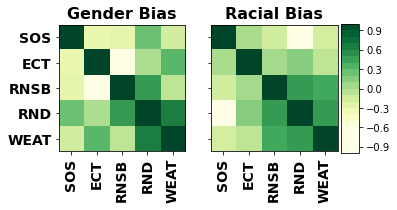

In [25]:
rows = ['SOS',"ECT","RNSB","RND","WEAT"]
columns =  ['SOS',"ECT","RNSB","RND","WEAT"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
x_ticks = np.arange(len(rows))
y_ticks = np.arange(len(columns))


# We use ax parameter to tell seaborn which subplot to use for this plot
#sns.heatmap(data=RAD_stat[columns].values.T, ax=axs[0], vmin=-1, vmax=1,cbar=True, cmap="YlGnBu")
im0 = axs[0].imshow(gender_bias_df.corr("spearman").values, cmap ="YlGn")
axs[0].set_title('Gender Bias', fontweight="bold", fontsize=16)
axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)
axs[0].set_xticklabels(["" for i in rows], fontweight="bold", rotation=90, fontsize=16)
axs[0].set_xticklabels(rows, fontweight="bold", rotation=90, fontsize=14)
axs[0].set_yticklabels(columns, fontweight="bold", rotation=0, fontsize=14)

#sns.heatmap(data=OHOE_US_stat[columns].values.T, ax=axs[1], vmin=-1, vmax=1,cbar=True, yticklabels=False,cmap="YlGnBu", cbar_kws={"orientation": "vertical"})
im1 = axs[1].imshow(racial_bias_df.corr("spearman").values, cmap ="YlGn")
axs[1].set_title('Racial Bias', fontweight="bold", fontsize=16)
axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)
axs[1].set_xticklabels(rows, fontweight="bold", rotation=90, fontsize=14)
axs[1].set_yticklabels([])

#plt.colorbar(im0,boundaries=np.arange(-1,1,0.1), shrink=0.7, orientation="horizontal", location="top")
cbar_ax = fig.add_axes([0.91, 0.2, 0.05, 0.6])
fig.colorbar(im1, cax=cbar_ax,boundaries=np.arange(-1,1.1,0.1), shrink=0.05)
#sns.heatmap(data=OEOH_fin_stat[columns], ax=ax4, vmin=-1, vmax=1,cbar=True, yticklabels=False,cbar_kws={'label': 'correlation'},cmap="YlGnBu")
#ax4.set_title('OEOH-UK', fontweight="bold", fontsize=35)
#ax4.set_ylabel("")
#ax4.set_xticklabels(columns, fontweight="bold", rotation=90, fontsize=35)

#sns.heatmap(data=OEOH_GR_stat[columns], ax=ax5, vmin=-1, vmax=1,cbar=False, yticklabels=False,cmap="YlGnBu")
#ax5.set_title('OEOH-Germany', fontweight="bold", fontsize=35)
#ax5.set_ylabel("")
#ax5.set_xticklabels(columns, fontweight="bold", rotation=45, fontsize=35)

#sns.heatmap(data=OEOH_fin_stat[columns], ax=ax5, vmin=-1, vmax=1,cbar=True, yticklabels=False,cbar_kws={'label': 'correlation'},cmap="YlGnBu")
#ax5.set_title('OEOH-FI', fontweight="bold", fontsize=35)
#ax5.set_ylabel("")
#ax5.set_xticklabels(columns, fontweight="bold", fontsize=35, rotation=90)

In [26]:
fig.savefig("bias_metrics_corr_swear_words_list2.pdf",bbox_inches='tight')